In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv("data/imena_novorojenckov.csv")

In [2]:
# Replace Nan values
data = data.replace({'-': '0'}, regex=True)

In [3]:
#Creating headers that will be used later
header = list(data.columns.values)
years = header[1:]
sort_by_list = [False for i in range(len(years))]
# Change all number in string to int
data[years] = data[years].apply(pd.to_numeric)
#Sort data
sorted_data = data.sort_values(by=years[::-1], ascending=sort_by_list)
len(years)

24

In [4]:
from sklearn import datasets, linear_model

#train_data_headers = ['Ime']
#for i in years[:12]:
#    train_data_headers.append(i)
condition = data['Ime'] == 'Rok' 
train_data_X = data[years[:12]]
train_data_X = train_data_X[condition].values

test_data_X = data[years[-12:]]
test_data_X = test_data_X[condition].values
train_data_Y = list(map(int, years[:12]))
test_data_Y = list(map(int, years[:12]))
train_data_Y

[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]

In [5]:
regr = linear_model.LinearRegression()

In [6]:
train_data_X = train_data_X.reshape(-1,1)
train_data_X
regr.fit(train_data_X, train_data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
test_data_X = test_data_X.reshape(-1,1)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))

Coefficients: 
 [-0.05821289]
Mean squared error: 60.88
Variance score: -4.11


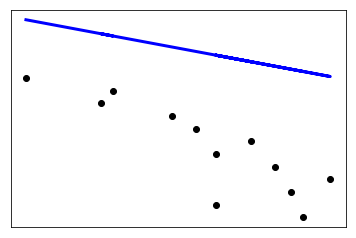

In [8]:
# Plot outputs
plt.scatter(test_data_X, test_data_Y,  color='black')
plt.plot(test_data_X, regr.predict(test_data_X), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
# Plot whole graph
all_data = data[years]
all_data = all_data[condition].values.reshape(-1,1)
all_data

array([[344],
       [355],
       [305],
       [307],
       [275],
       [265],
       [243],
       [217],
       [213],
       [207],
       [185],
       [172],
       [154],
       [132],
       [151],
       [161],
       [147],
       [132],
       [141],
       [127],
       [121],
       [103],
       [106],
       [ 84]])

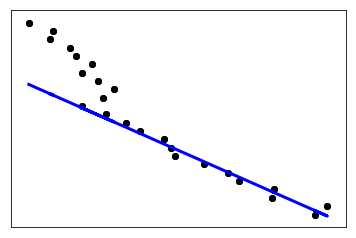

In [18]:
plt.scatter(all_data, years,  color='black')
plt.plot(all_data, regr.predict(all_data), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
data[condition]

,Ime,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
334,Rok,344,355,305,307,275,265,243,217,213,...,151,161,147,132,141,127,121,103,106,84
